# Steps  or Breakdown of the Project

In [3]:
This sounds like a fantastic and impactful project! We can break it down into key steps to get a clearer idea of the tasks ahead:

Data Preparation (Flickr8K Dataset):

Download and preprocess the Flickr8K dataset.
Tokenize and clean captions to prepare for training.
Split the dataset into training, validation, and test sets.
Feature Extraction (CNN Encoder):

Use a pretrained CNN (e.g., VGG16 or ResNet) to extract features from the images.
Fine-tune the CNN for optimal feature extraction for caption generation.
Caption Generation (RNN Decoder with Attention):

Design an RNN (e.g., LSTM or GRU) decoder model that takes the image features and generates captions.
Implement an attention mechanism to focus on relevant parts of the image as each word is generated.
Training the Model:

Train the CNN-RNN model on the processed dataset with the attention mechanism to generate accurate captions.
Text-to-Speech Conversion:

Integrate a TTS library (like gTTS or pyttsx3) to convert generated captions into speech.
Testing and Evaluation:

Test the model on unseen images, evaluate the quality of captions, and measure the accuracy.
Deployment and Usability:

Package the model and create a user-friendly interface that generates speech output from uploaded images.

SyntaxError: invalid syntax (1229273566.py, line 1)

# Installing the Required Libraries 

In [1]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [4]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.python.client import device_lib
from sklearn.model_selection import train_test_split
import os

## Loading the dataset

In [9]:
import os
import string
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Define paths based on your setup
dataset_dir = "/Users/salmanmohamm3d/Downloads/archive/Flickr8k_text"
images_dir = "/Users/salmanmohamm3d/Downloads/archive/Flickr8k_Dataset/Flicker8k_Dataset"

# File paths for captions and image splits
captions_file = os.path.join(dataset_dir, "Flickr8k.token.txt")
train_images_file = os.path.join(dataset_dir, "Flickr_8k.trainImages.txt")
val_images_file = os.path.join(dataset_dir, "Flickr_8k.devImages.txt")
test_images_file = os.path.join(dataset_dir, "Flickr_8k.testImages.txt")

# Load captions
def load_captions(captions_file):
    captions_dict = {}
    with open(captions_file, 'r') as file:
        for line in file:
            image_id, caption = line.split('\t')
            image_id = image_id.split('#')[0]
            caption = caption.strip().lower().translate(str.maketrans('', '', string.punctuation))
            if image_id not in captions_dict:
                captions_dict[image_id] = []
            captions_dict[image_id].append(caption)
    return captions_dict

# Load image lists
def load_image_list(file_path):
    with open(file_path, 'r') as file:
        images = [line.strip() for line in file]
    return images

captions = load_captions(captions_file)
train_images = load_image_list(train_images_file)
val_images = load_image_list(val_images_file)
test_images = load_image_list(test_images_file)

# Verify loaded data
print("Sample captions for an image:")
sample_image_id = list(captions.keys())[0]
print(f"{sample_image_id}: {captions[sample_image_id]}")

print("\nNumber of training images:", len(train_images))
print("Number of validation images:", len(val_images))
print("Number of test images:", len(test_images))

# Updated display function with key existence check
def display_image_with_captions(image_id, captions_dict):
    image_file = os.path.join(images_dir, image_id)
    image = Image.open(image_file)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    # Check if image_id (without .jpg) exists in captions_dict
    caption_key = image_id.split(".")[0]  # Use split to remove .jpg if it exists
    if caption_key in captions_dict:
        sample_captions = captions_dict[caption_key]
        print("Captions for image {}:\n".format(image_id))
        for caption in sample_captions:
            print("-", caption)
    else:
        print("No captions found for image:", image_id)




Sample captions for an image:
1000268201_693b08cb0e.jpg: ['a child in a pink dress is climbing up a set of stairs in an entry way ', 'a girl going into a wooden building ', 'a little girl climbing into a wooden playhouse ', 'a little girl climbing the stairs to her playhouse ', 'a little girl in a pink dress going into a wooden cabin ']

Number of training images: 6000
Number of validation images: 1000
Number of test images: 1000


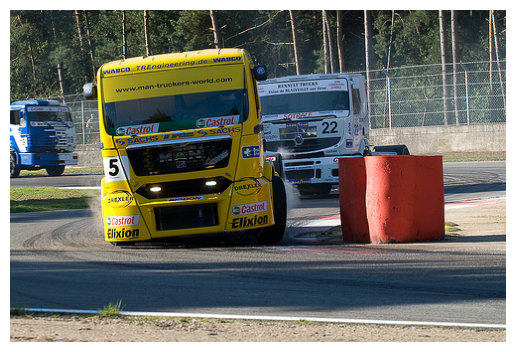

No captions found for image: 2862481071_86c65d46fa.jpg


In [11]:
# Test the function again with a sample image
sample_image = train_images[250]
display_image_with_captions(sample_image, captions)

In [7]:
# Count total images in each set
total_train_images = len(train_images)
total_val_images = len(val_images)
total_test_images = len(test_images)
total_images = total_train_images + total_val_images + total_test_images

# Count total captions
total_captions = sum(len(captions[image_id]) for image_id in captions)

# Print the results
print(f"Total images: {total_images}")
print(f" - Training images: {total_train_images}")
print(f" - Validation images: {total_val_images}")
print(f" - Test images: {total_test_images}")
print(f"Total captions: {total_captions}")


Total images: 8000
 - Training images: 6000
 - Validation images: 1000
 - Test images: 1000
Total captions: 40460
